In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, t

# Define the data
mouse_data = pd.DataFrame({
    'size': [1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3],
    'weight': [0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3],
    'tail': [0.7, 1.3, 0.7, 2.0, 3.6, 3.0, 2.9, 3.9, 4.0]
})

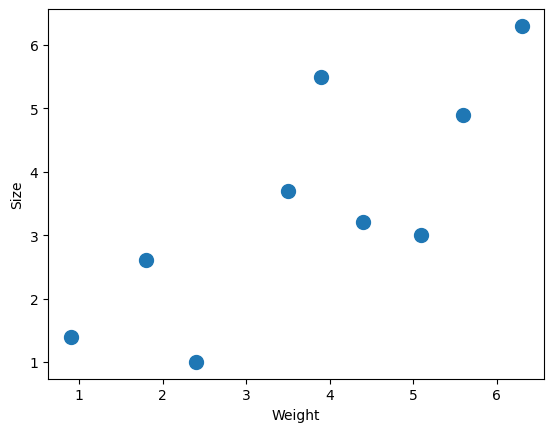

In [2]:
# STEP 1: Draw a graph of the data to make sure the relationship makes sense
plt.scatter(mouse_data['weight'], mouse_data['size'], marker='o', s=100)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.show()

In [3]:
# STEP 2: Do the regression
simple_regression = np.polyfit(mouse_data['weight'], mouse_data['size'], 1)

In [4]:
# STEP 3: Look at the R^2, F-value, and p-value
residuals = mouse_data['size'] - (simple_regression[1] + simple_regression[0] * mouse_data['weight'])
ss_mean = np.sum((mouse_data['size'] - np.mean(mouse_data['size'])) ** 2)
ss_simple = np.sum(residuals ** 2)
r_squared = (ss_mean - ss_simple) / ss_mean
n = mouse_data.shape[0]
df_reg = 1
df_res = n - df_reg - 1
f_value = (ss_mean - ss_simple) / df_reg / (ss_simple / df_res)
p_value = 1 - f.cdf(f_value, df_reg, df_res)

print('R-squared:', r_squared)
print('F-value:', f_value)
print('p-value:', p_value)

R-squared: 0.6132867420657665
F-value: 11.101267169874108
p-value: 0.012559062326425341


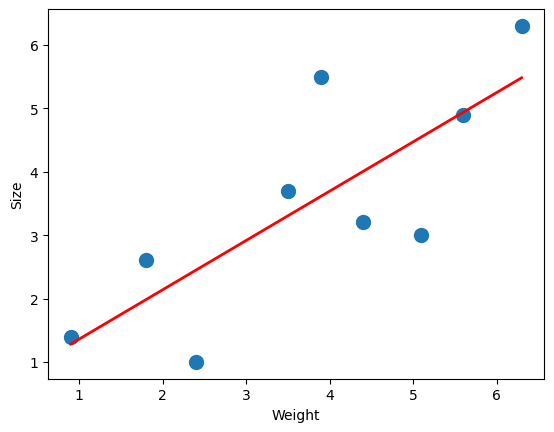

In [5]:
# Plot the regression line
plt.scatter(mouse_data['weight'], mouse_data['size'], marker='o', s=100)
plt.plot(mouse_data['weight'], simple_regression[1] + simple_regression[0] * mouse_data['weight'], color='red', linewidth=2)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.show()

In [7]:
# Now let's do multiple regression by adding the 'tail' term
X = mouse_data[['weight', 'tail']]
X = np.column_stack((np.ones(X.shape[0]), X))  # Add a column of ones for the intercept
multiple_regression = np.linalg.lstsq(X, mouse_data['size'], rcond=None)[0]

In [8]:
# Look at the R^2, F-value, and p-value
residuals = mouse_data['size'] - np.dot(X, multiple_regression)
ss_multiple = np.sum(residuals ** 2)
r_squared = (ss_mean - ss_multiple) / ss_mean
df_reg = 2
df_res = n - df_reg - 1
f_value = (ss_mean - ss_multiple) / df_reg / (ss_multiple / df_res)
p_value = 1 - f.cdf(f_value, df_reg, df_res)

In [9]:
print('R-squared:', r_squared)
print('F-value:', f_value)
print('p-value:', p_value)

R-squared: 0.8496437693322928
F-value: 16.952615110644192
p-value: 0.003399102720405889


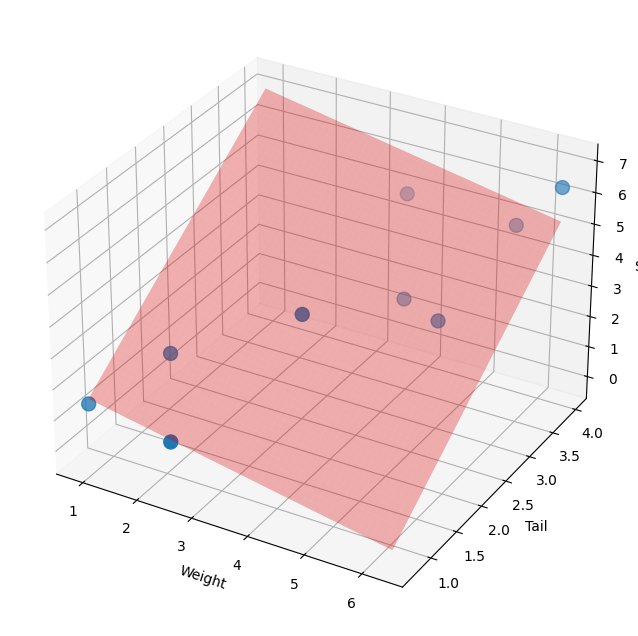

In [11]:
# Plot the regression plane
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mouse_data['weight'], mouse_data['tail'], mouse_data['size'], marker='o', s=100)
x_surf, y_surf = np.meshgrid(np.linspace(mouse_data['weight'].min(), mouse_data['weight'].max(), 100),
                             np.linspace(mouse_data['tail'].min(), mouse_data['tail'].max(), 100))
X_surf = np.column_stack((np.ones(x_surf.size), x_surf.flatten(), y_surf.flatten()))
z_surf = np.dot(X_surf, multiple_regression)
z_surf = z_surf.reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)
ax.set_xlabel('Weight')
ax.set_ylabel('Tail')
ax.set_zlabel('Size')
plt.show()

In [12]:
# Comparison between simple and multiple regression
f_simple_vs_multiple = ((ss_simple - ss_multiple) / (1)) / (ss_multiple / (n - df_reg - 1))
p_value_simple_vs_multiple = 1 - f.cdf(f_simple_vs_multiple, 1, n - df_reg - 1)

print('p-value (simple vs. multiple):', p_value_simple_vs_multiple)

p-value (simple vs. multiple): 0.02191013754486637
